In [1]:
# data analysis
import pandas as pd 
import numpy as np
import time
from imblearn.over_sampling import SMOTE

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

sns.set_style('darkgrid')
sns.set_palette('deep')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
print(f'Train shape: {train.shape}')
print(f'Test shape: {test.shape}')

Train shape: (891, 12)
Test shape: (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Types Of Features
#### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Nominal Features in the dataset: **Sex,Embarked,Survived,Name,PassengerId**.

#### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: **PClass**

#### Numerical Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: **Age,Fare**

#### Discrete features:
Discrete features are countable and represent distinct values that have gaps between them. Examples include the number of siblings a person has, the count of items in a shopping cart, or the number of bedrooms in a house.

Discrete Features in the dataset: **Parch , SibSp**

**Alphanumeric features - Ticket, Cabin**

* **count**: The count of non-null values for each column.
* **unique**: The number of unique values in each column.
* **top**: The most common value in each column.
* **freq**: The frequency (count) of the most common value.
* **mean**: The mean (average) of the numerical values in each column.
* **std**: The standard deviation, which measures the spread of the data around the mean.
* **min**: The minimum value in each column.
* **25**%: The first quartile, also known as the 25th percentile.
* **50**%: The second quartile, also known as the median or 50th percentile.
* **75%**: The third quartile, also known as the 75th percentile.
* **max**: The maximum value in each column.

In [4]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


1. Age and Cabin has null values
2. Some outlier can be seen in Fare(mean and 50% are has large difference)

In [5]:
# check for null values
print(f'Total NaN values in train: {train.isna().sum().sum()}')
print(train.isna().sum())
print('-'*30)
print(f'Total NaN values in test: {test.isna().sum().sum()}')
print(test.isna().sum())

Total NaN values in train: 866
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Total NaN values in test: 414
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# for easy preprocessing making a combined dataframe of train and test
total = pd.concat([train,test],axis=0)
total = total.reset_index(drop=True)
y = train['Survived']
print(total.shape)
total.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

### Age and Fare (Numerical - Continous Features)

1. Age - Age in years
2. fare - Passenger fare

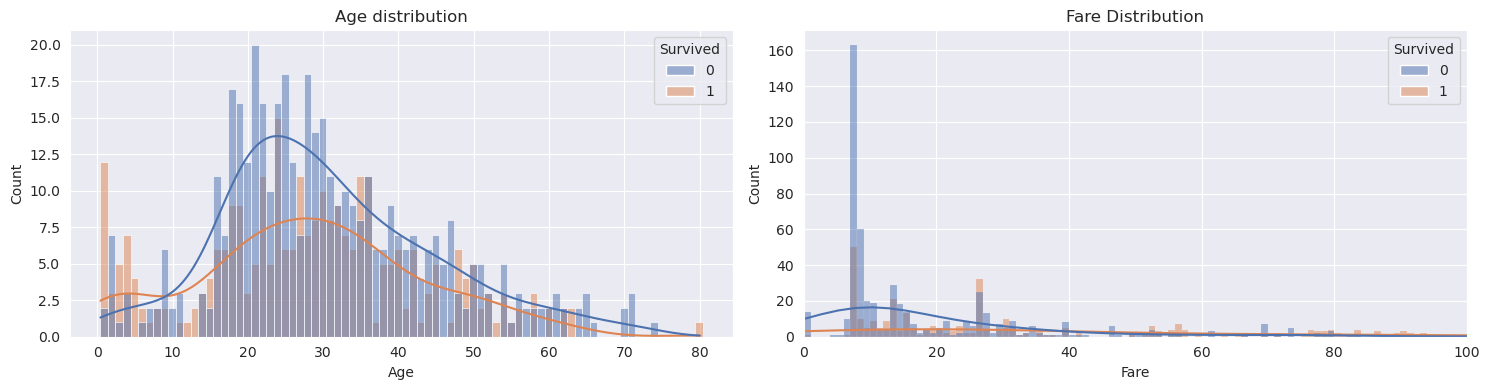

In [7]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
sns.histplot(data = train , x='Age',hue='Survived',kde=True,binwidth=1,ax=ax1)
ax1.set_title('Age distribution')

sns.histplot(data = train , x='Fare',hue='Survived',kde=True,binwidth=1,ax=ax2,bins=100)
ax2.set_xlim([0,100])
ax2.set_title('Fare Distribution')

fig.tight_layout()
plt.show()

#### Age
1.  Age has normal distribution.
2.  0-9 years of children has high chances of survival
3.  People with 10+ age has high chances of not survival

#### Fare
1. Fare is highly positive skewed
2. Also denotes that majority of people paid less fair(or in other words majority of people belonged to lower class PClass= 3) 
3. Fare between 0-50 has higher chances of not survival  

Insights:
* Make a new feature to denote a person as infant,child,adolscent,adult
* Make a new feature to band Fare

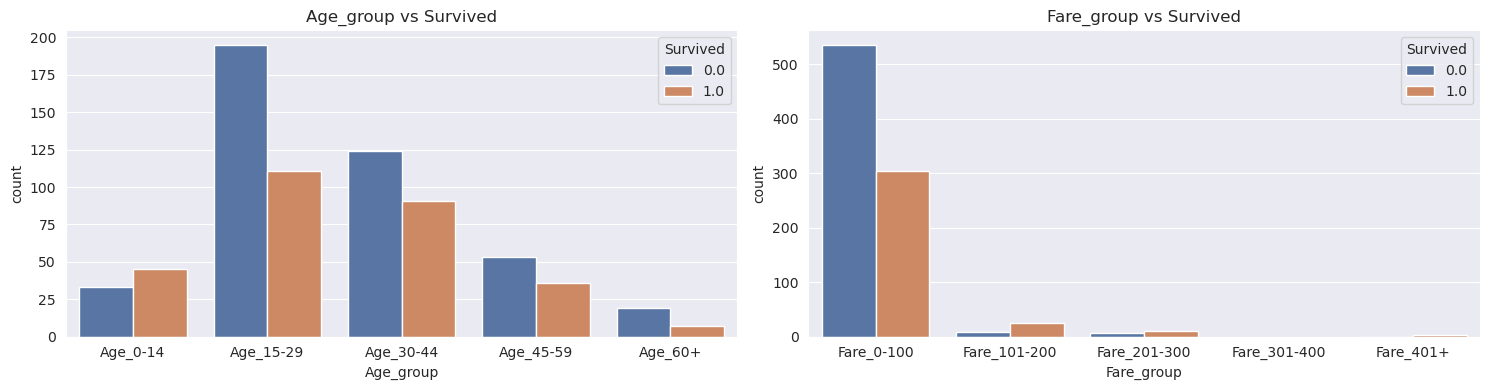

In [8]:
# new feature Age group from Age
total['Age_group'] = np.nan
total.loc[(total['Age'] < 15) ,'Age_group' ] = 'Age_0-14'
total.loc[(total['Age'] >= 15) & (total['Age'] < 30) ,'Age_group' ] = 'Age_15-29'
total.loc[(total['Age'] >= 30) & (total['Age'] < 45) ,'Age_group' ] = 'Age_30-44'
total.loc[(total['Age'] >= 45) & (total['Age'] < 60) ,'Age_group' ] = 'Age_45-59'
total.loc[(total['Age'] >= 60) , 'Age_group'] = 'Age_60+'

# new feature Fare group from 'Fare'
total['Fare_group'] = np.nan
total.loc[(total['Fare'] >= 0)  & (total['Fare'] <= 100) ,'Fare_group'] = 'Fare_0-100' 
total.loc[(total['Fare'] > 100) & (total['Fare'] <= 200) ,'Fare_group'] = 'Fare_101-200'
total.loc[(total['Fare'] > 200) & (total['Fare'] <= 300) ,'Fare_group'] = 'Fare_201-300'
total.loc[(total['Fare'] > 300) & (total['Fare'] <= 400) ,'Fare_group'] = 'Fare_301-400'
total.loc[(total['Fare'] > 400),'Fare_group'] = 'Fare_401+'


fig = plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(data = total,x = 'Age_group',hue='Survived',order=['Age_0-14','Age_15-29', 'Age_30-44','Age_45-59', 'Age_60+'])
plt.title('Age_group vs Survived')

plt.subplot(1,2,2)
sns.countplot(data = total,x = 'Fare_group',hue='Survived',order=['Fare_0-100','Fare_101-200', 'Fare_201-300','Fare_301-400', 'Fare_401+'])
plt.title('Fare_group vs Survived')
plt.tight_layout()
plt.show()

### Parch and SibSp (Numerical - Discrete Features)

sibsp - # of siblings / spouses aboard the Titanic

parch - # of parents / children aboard the Titanic. Some children travelled only with a nanny, therefore parch=0 for them.

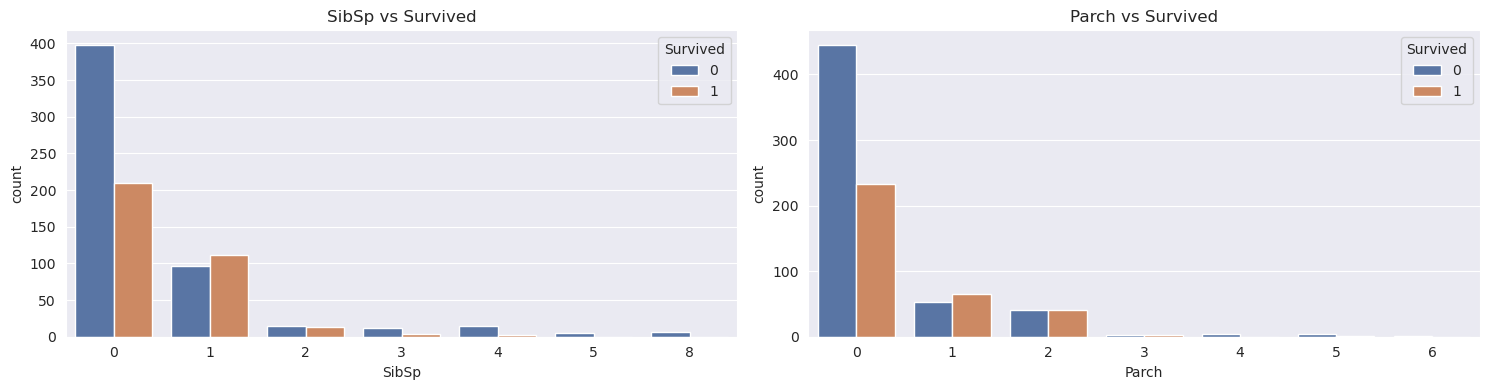

In [9]:
fig , ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(data = train , x='SibSp',hue='Survived',ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.countplot(data = train , x='Parch',hue='Survived',ax=ax[1])
ax[1].set_title('Parch vs Survived')

fig.tight_layout()
plt.show()    

We can see the same trend in both the plots.

1. People with 0 SibSp and Parch(or who are travelling alone) has high chances of not survival
2. People with 1 or 2 SibSp has high to equal chances of survival
3. People that has more than 2 SibSp or Parch has high chances of not surviving

Insights:
* Make a new feature to track the total size of the family
* A new feature to track if a person is travelling Alone or not

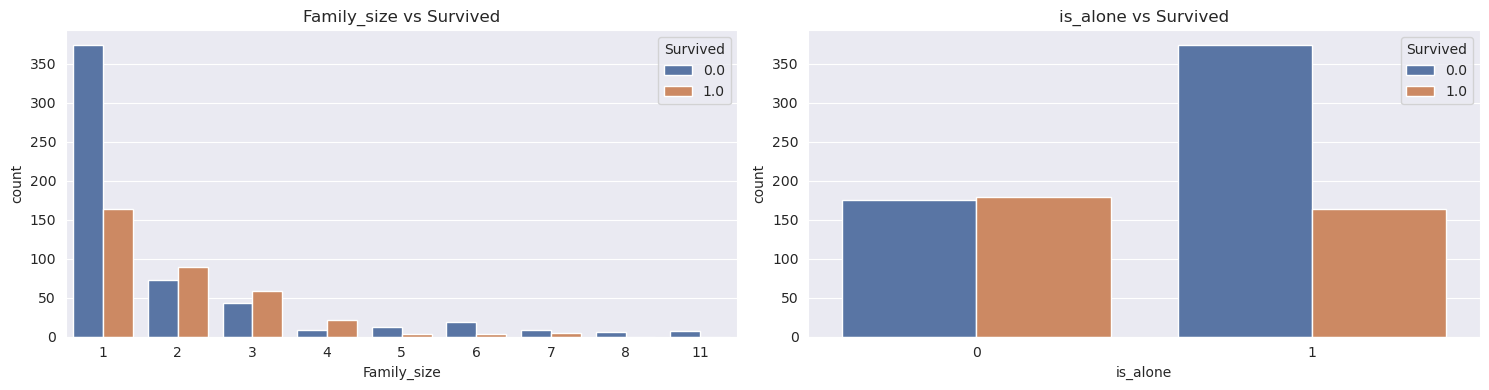

In [10]:
# new feature Family size
total['Family_size'] = total['SibSp'] + total['Parch'] + 1

# new feature Alone(family size=1)
total['is_alone'] = total['Family_size'].map(lambda x: 1 if x==1 else 0)

fig , ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(data = total , x='Family_size',hue='Survived',ax=ax[0])
ax[0].set_title('Family_size vs Survived')

sns.countplot(data = total , x='is_alone',hue='Survived',ax=ax[1])
ax[1].set_title('is_alone vs Survived')

fig.tight_layout()
plt.show()   

### PClass (Categorical - Ordinal Feature) 

pclass: A proxy for socio-economic status (SES)

1. 1st = Upper
2. 2nd = Middle
3. 3rd = Lower

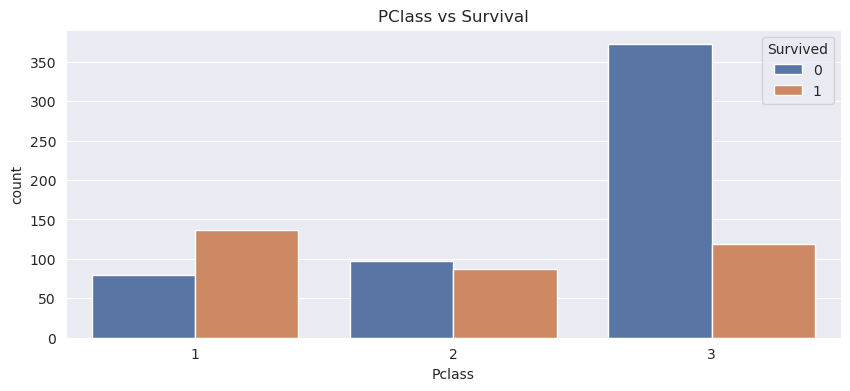

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(data = train , x = 'Pclass', hue = 'Survived')
plt.title('PClass vs Survival')
plt.show()

1. PClass = 3 has highest number of passengers than the other classes and also the highest rate of not survival . One reason can be because they have low SES.
2. PClass = 1 has highest survival rate than the other classes because they have high SES.


### Sex and Embarked - (Categorical - Nominal Features)

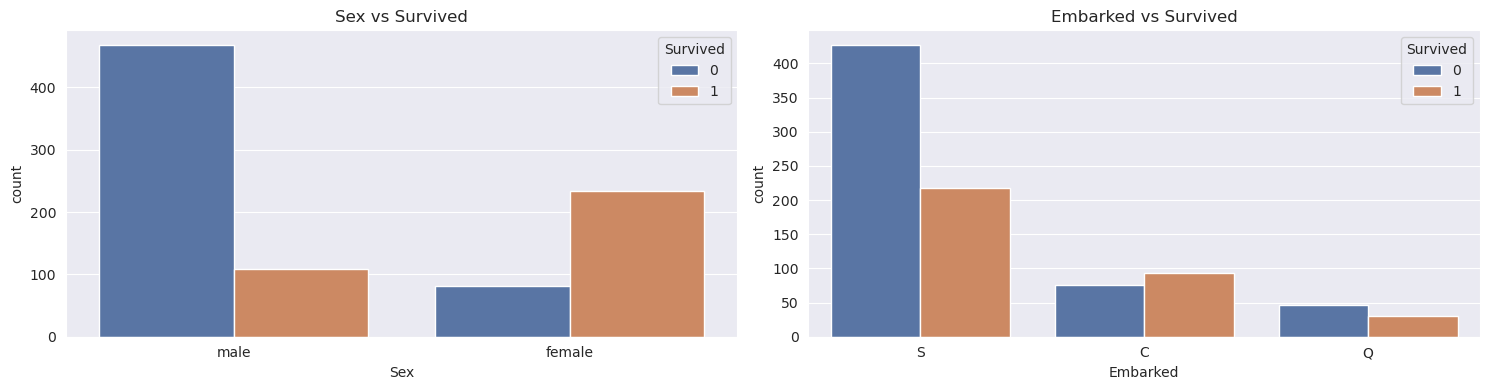

In [12]:
fig , ax = plt.subplots(1,2,figsize=(15,4))
sns.countplot(data = train , x='Sex',hue='Survived',ax=ax[0])
ax[0].set_title('Sex vs Survived')

sns.countplot(data = train , x='Embarked',hue='Survived',ax=ax[1])
ax[1].set_title('Embarked vs Survived')

fig.tight_layout()
plt.show()    

##### Sex
1. More Females survived than Male, even though there were more Males than Females. This tells us that Females were given preference higher than men during rescue.

##### Embarked
1. Most people Embarked from **Southampton** but mostly did not survive.
2. People from Port C has high chances of survival

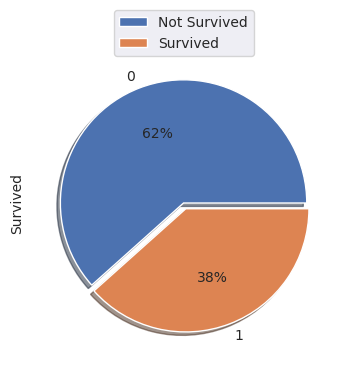

In [13]:
# target distribution
plt.figure(figsize=(10,4))
train['Survived'].value_counts().plot.pie(explode=[0,0.05],shadow=True, autopct='%.0f%%')
plt.legend(['Not Survived','Survived'],bbox_to_anchor =(0.75, 1.15))
plt.show()

### Multivariate analysis

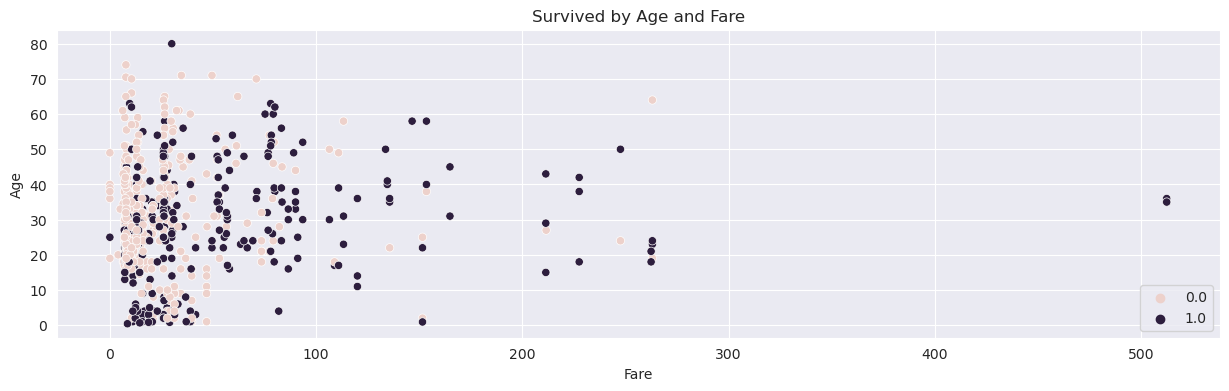

In [14]:
plt.figure(figsize=(15,4))
sns.scatterplot(data=total,x='Fare',y='Age',hue='Survived')
plt.title('Survived by Age and Fare')
plt.legend(loc='lower right')
plt.show()

1. Most people has fare within 100. 
2. After 500 some outlier can be seen.

### Age , Pclass and Survived

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


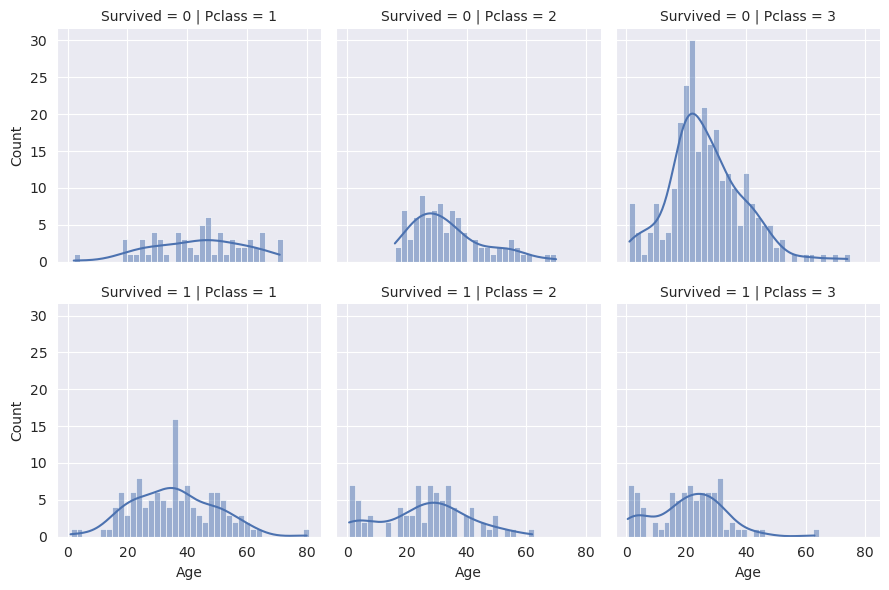

In [15]:
grid = sns.FacetGrid(train , col='Pclass',row='Survived')
grid.map(sns.histplot,'Age',kde=True,binwidth=2)
plt.show()

1. Most People in  Pclass = 1 had survived
2. Infants passengers from Pclass = 2 and 3 mostly survived.
3. Most People were in Pclass = 3 and mostly did not survive
4. As the Pclass is changing , people Age with respect to target(Survived) is also changing which shows that **Pclass is coorealted with Age**

From the above distribution of **Sex vs Survived** , we saw that Females survived more than Men. Let's try to find that how *Pclass* affected on the survival of Men and Female.

### Pclass , Sex and Survived

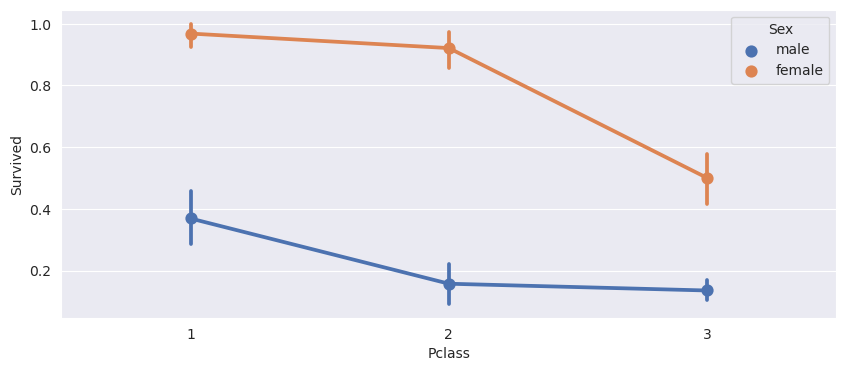

In [16]:
plt.figure(figsize=(10,4))
sns.pointplot(data = train , x = 'Pclass' , y = 'Survived' , hue='Sex')
plt.show()

1. Females from all the Pclass has better survival rate than Men .
2. Survival rate decreasing as Pclass increasing . Show negative coorelation between the two

From above observation we found that Sex and Pclass largely contributed for a person survival. Let's see tha place of Embarked has any affect on survival

### Embarked, Pclass, Sex and Survived 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


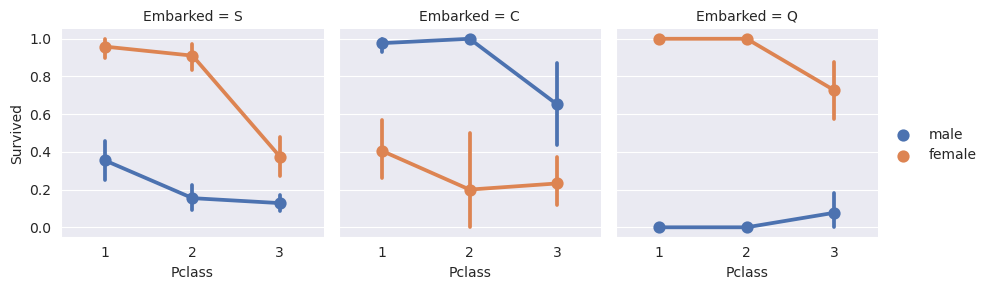

In [17]:
grid = sns.FacetGrid(data = train , col = 'Embarked')
grid.map_dataframe(sns.pointplot,x='Pclass',y='Survived',hue='Sex',palette='deep')
grid.add_legend()
plt.show()

1. Females from Port S(SouthHampton) and Q(Queenstown) survived more than Men.
2. Male from Port C(Cherbourg) survived more than Female

### Fare, Embarked, Sex and Survived

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


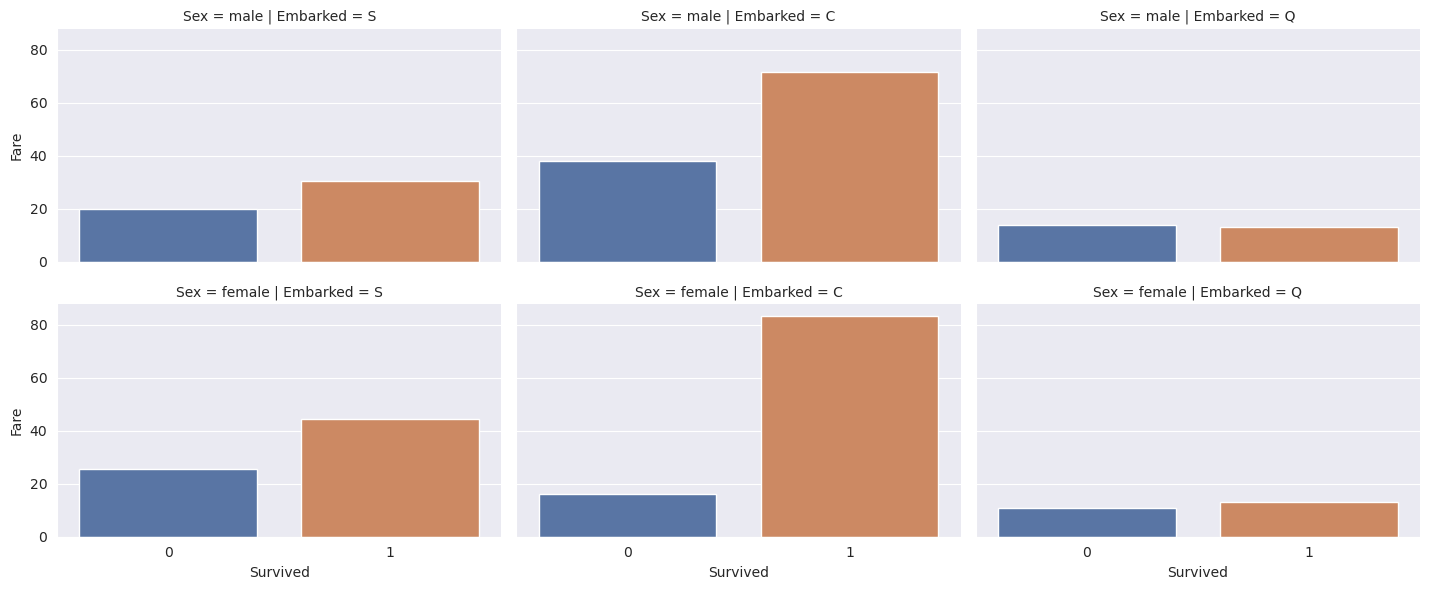

In [18]:
grid = sns.FacetGrid(data = train , col = 'Embarked' , row = 'Sex' , aspect=1.6)
grid.map_dataframe(sns.barplot,x='Survived',y='Fare',palette='deep',errorbar=None)
plt.show()

* Higher Fare paying passengers had survived more than low Fare paying passengers.

## Feature Engineering

In [19]:
# Extracting Title from Name feature
total['Title'] = total['Name'].str.extract(r'([a-zA-Z]+)\.')

# see the count of sex of the extracted Title
total.groupby(['Title','Sex']).size().unstack().fillna(0).astype(int)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [20]:
# replace the less occuring Title with a more commonly name or flag it as 'Rare'
# total['Title'] = total['Title'].str.replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Sir','Rev'],'Rare')

titles_to_replace = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Sir', 'Rev']
replacement_value = 'Rare'

total['Title'] = total['Title'].replace('|'.join(titles_to_replace), replacement_value, regex=True)

total['Title'] = total['Title'].str.replace('Mlle','Miss')
total['Title'] = total['Title'].str.replace('Ms','Miss')
total['Title'] = total['Title'].str.replace('Mme','Mrs')
total['Title'] = total['Title'].str.replace('Rarea','Rare')

# mean of people survived by their Title
total.groupby(['Title'])['Survived'].mean()

Title
Master    0.575000
Miss      0.702703
Mr        0.156673
Mrs       0.793651
Rare      0.347826
Name: Survived, dtype: float64

In [21]:
total.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Age_group       263
Fare_group        1
Family_size       0
is_alone          0
Title             0
dtype: int64

## Missing value Imputation

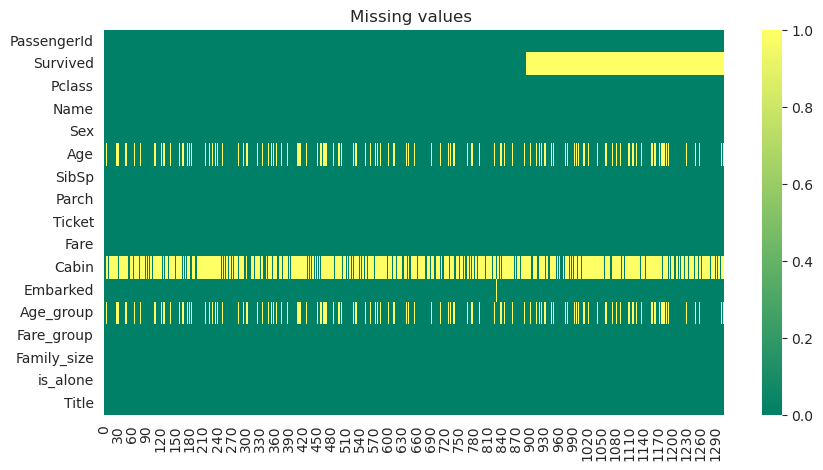

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(total.isna().T , cmap='summer')
plt.title('Missing values ')
plt.show()

Cabin number and cabin deck were created from Cabin so the missing values are occuring at the same time. Same with age and Age group. Apart from these no feature has missing values.

### Age 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


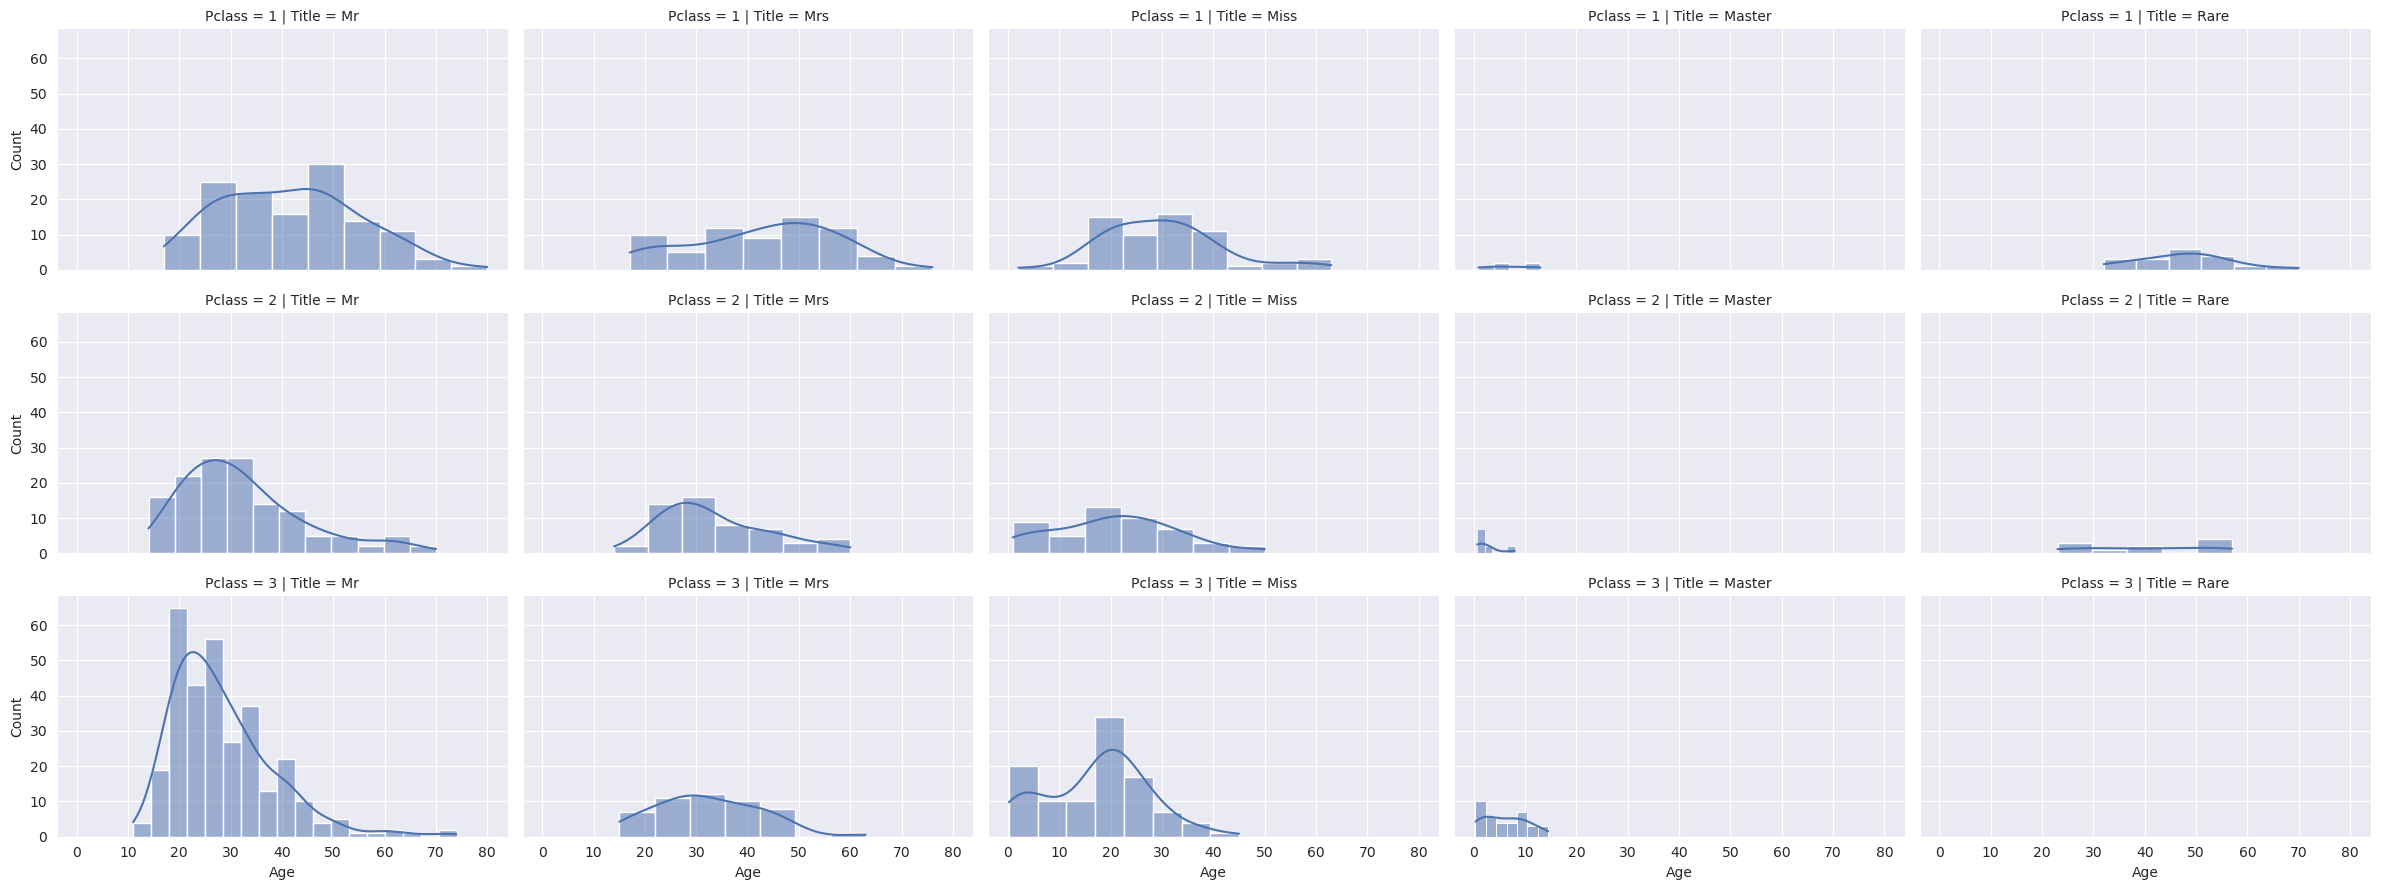

In [23]:
grid = sns.FacetGrid(total, col='Title',row='Pclass',aspect=1.6)
grid.map(sns.histplot, 'Age',kde=True)
grid.add_legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


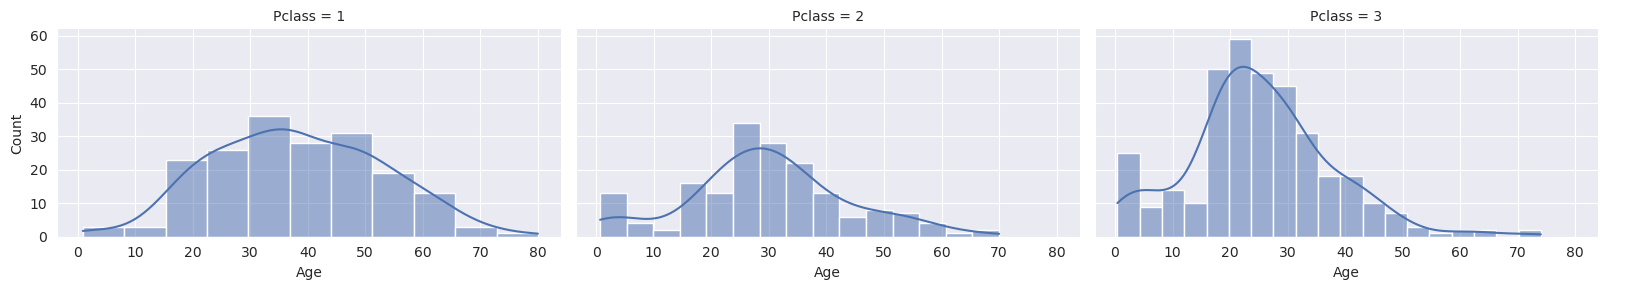

In [24]:
grid = sns.FacetGrid(train, col='Pclass', aspect=1.8)
grid.map(sns.histplot, 'Age', alpha=.5,kde=True)
grid.add_legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


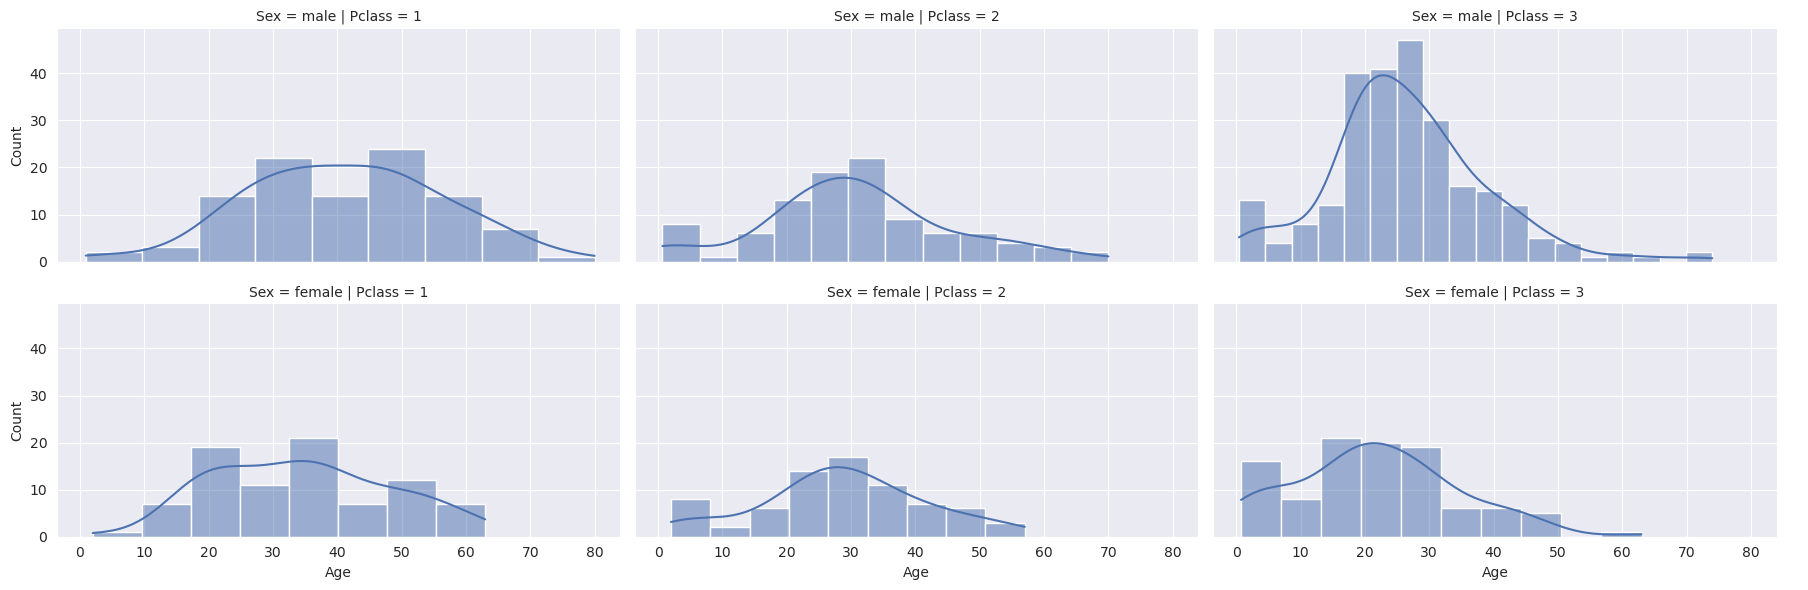

In [25]:
grid = sns.FacetGrid(train, row='Sex',col='Pclass', aspect=2)
grid.map(sns.histplot, 'Age', alpha=.5,kde=True)
grid.add_legend()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


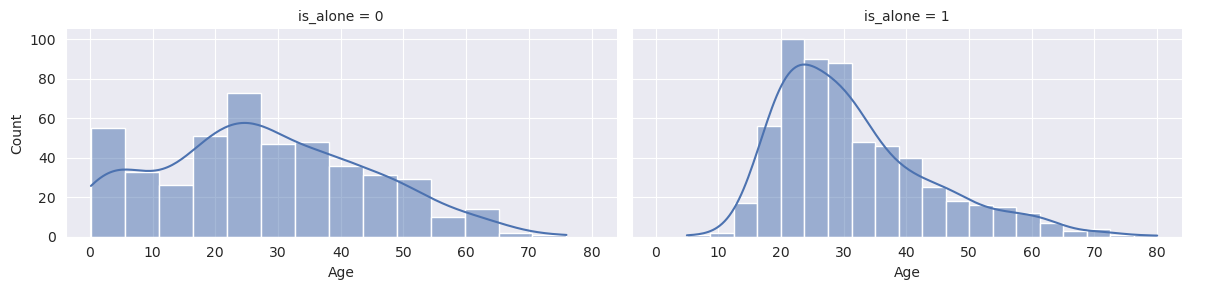

In [26]:
grid = sns.FacetGrid(total, col='is_alone', aspect=2)
grid.map(sns.histplot, 'Age', alpha=.5,kde=True)
grid.add_legend()
plt.show()

Age varies across multiple features like Pclass, Sex, is_alone, Title. Let's use these features to fill in the missing values.

In [27]:
print('Filling missing Age values using:  [Pclass','is_alone','Sex','Title]')
Age_missing_rows = total['Age'].isna()

grouped_median_Age = total.groupby(['Pclass','is_alone','Sex','Title'])['Age'].median()

for index , row in total[Age_missing_rows].iterrows():
    total.at[index , 'Age'] = grouped_median_Age.get((row['Pclass'],row['is_alone'],row['Sex'],row['Title']))
    
Age_bef = Age_missing_rows.sum()
Age_after = total['Age'].isna().sum()
print('Age missing values before:',Age_bef)
print('Age missing values after:',Age_after)
print()

# use 'Pclass','Fare_group','Sex','Title' to fill remaining missing values
if Age_after != 0:
    print('Filling missing Age values using : [Pclass','Fare_group','Sex','Title]')
    Age_missing_rows = total['Age'].isna()
    grouped_median_Age = total.groupby(['Pclass','Fare_group','Sex','Title'])['Age'].median()
    for index , row in total[Age_missing_rows].iterrows():
        total.at[index , 'Age'] = grouped_median_Age.get((row['Pclass'],row['Fare_group'],row['Sex'],row['Title']))
    Age_bef = Age_missing_rows.sum()
    Age_after = total['Age'].isna().sum()
    print('Age missing values before:',Age_bef)
    print('Age missing values after:',Age_after)

Filling missing Age values using:  [Pclass is_alone Sex Title]
Age missing values before: 263
Age missing values after: 1

Filling missing Age values using : [Pclass Fare_group Sex Title]
Age missing values before: 1
Age missing values after: 0


### Embarked

Since Embarked has 2 missing values , we'll fill it using mode.

In [28]:
# let's see the missing values in Embarked
total[total['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Fare_group,Family_size,is_alone,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Age_30-44,Fare_0-100,1,1,Miss
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Age_60+,Fare_0-100,1,1,Mrs


Both the passengers are from Pclass 1 , Female and travelling Alone

In [29]:
Emb_bef = total.Embarked.isna().sum()
total.loc[(total.Embarked.isna()),'Embarked']  = total[(total.Pclass == 1) & (total['Sex'] == 'female') & (total.is_alone == 1)]['Embarked'].mode()[0]

Emb_after = total.Embarked.isna().sum()
print('Embarked missing values before:',Emb_bef)
print('Embarked missing values after:',Emb_after)

Embarked missing values before: 2
Embarked missing values after: 0


### Fare

In [30]:
# since Fare has 1 missing values , we'll fill it with mean

fare_bef = total.Fare.isna().sum()
total['Fare'].fillna(total['Fare'].mean(),inplace=True)

fare_after = total.Fare.isna().sum()
print('Fare missing values before:',fare_bef)
print('Fare missing values after:',fare_after)

Fare missing values before: 1
Fare missing values after: 0


In [31]:
total.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Age_group       263
Fare_group        1
Family_size       0
is_alone          0
Title             0
dtype: int64

In [32]:
# removing redundant,high corelated features
total = total.drop(['Name','SibSp','Parch','Ticket','Cabin','Age_group','Fare_group','Family_size'],axis=1)
print(total.shape)
total.head()

(1309, 9)


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,1,0.0,3,male,22.0,7.2500,S,0,Mr
1,2,1.0,1,female,38.0,71.2833,C,0,Mrs
2,3,1.0,3,female,26.0,7.9250,S,1,Miss
3,4,1.0,1,female,35.0,53.1000,S,0,Mrs
4,5,0.0,3,male,35.0,8.0500,S,1,Mr


Use Log transform to reduce skewness in Fare feature

* Applying a logarithmic transformation to the data can help to spread out the values of the data points and reduce the difference between the smallest and largest values. This can result in a more symmetric distribution, making the data closer to a normal (Gaussian) distribution, which can benefit certain statistical analyses and machine learning algorithms.
* It will also help to reduce the effect of outliers

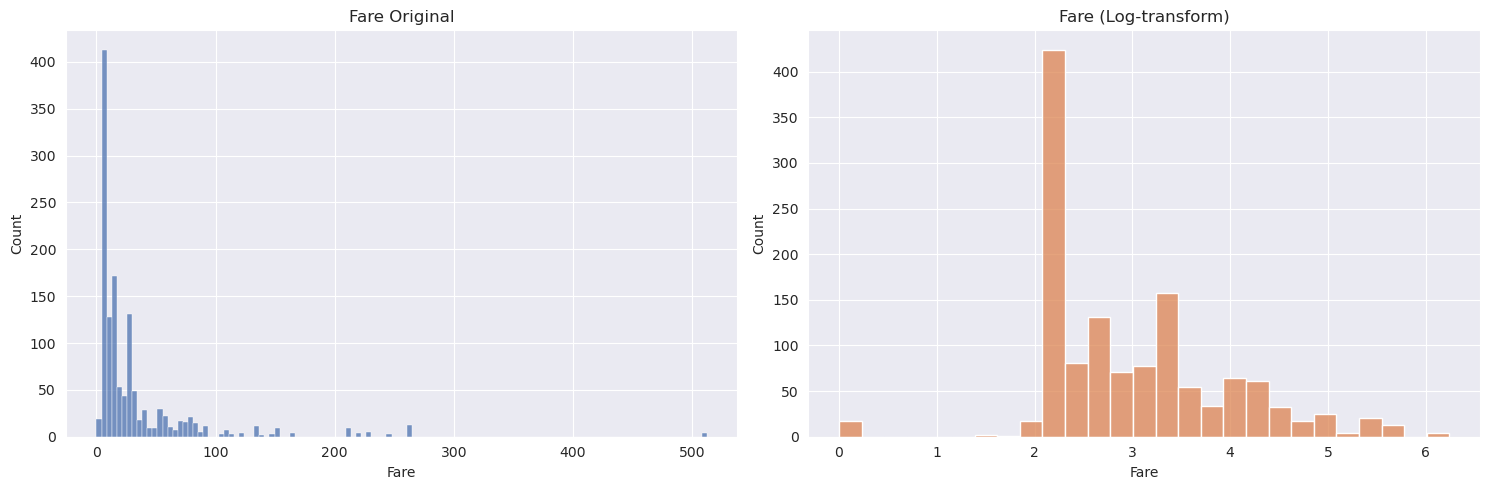

In [33]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
for i, col in enumerate(['Fare']):
    sns.histplot(total[col],ax=ax[0])
    ax[0].set_title(f'{col} Original')

    sns.histplot(np.log(1+total[col]), color='C1',ax=ax[1])
    ax[1].set_title(f'{col} (Log-transform)')

fig.tight_layout()
plt.show()

# Apply log transform
total['Fare'] = np.log(1+total['Fare'])

In [34]:
# split back into train and test
train = total[total.PassengerId.isin(train.PassengerId)]
test = total[total.PassengerId.isin(test.PassengerId)]

y = train['Survived']
train = train.drop(['PassengerId','Survived'],axis=1)
test = test.drop(['Survived'],axis=1)

In [35]:
train_copy = train.copy()
train.head()

,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
0,3,male,22.0,2.110213,S,0,Mr
1,1,female,38.0,4.280593,C,0,Mrs
2,3,female,26.0,2.188856,S,1,Miss
3,1,female,35.0,3.990834,S,0,Mrs
4,3,male,35.0,2.202765,S,1,Mr


In [36]:
test_copy = test.copy()
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,is_alone,Title
891,892,3,male,34.5,2.178064,Q,1,Mr
892,893,3,female,47.0,2.079442,S,0,Mrs
893,894,2,male,62.0,2.369075,Q,1,Mr
894,895,3,male,27.0,2.268252,S,1,Mr
895,896,3,female,22.0,2.586824,S,0,Mrs


In [37]:
num_cols = ['Age','Fare']
cat_cols = [col for col in train.columns if train[col].dtype in (['object'])]

num_transformer = Pipeline(steps=[('scaler',StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot',OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output=False))])

# combine preprocessing
ct = ColumnTransformer(transformers = [
                      ( 'numerical',num_transformer,num_cols),
                      ('categorical',cat_transformer,cat_cols)],
                      remainder='passthrough')

train = ct.fit_transform(train)
test = ct.transform(test)

# Print new shape
print('Training set shape:', train.shape)

Training set shape: (891, 13)


In [38]:
# required for feature importance
transformed_num_cols = ct.named_transformers_['numerical']['scaler'].get_feature_names_out(input_features=num_cols).tolist()
transformed_cat_cols = ct.named_transformers_['categorical']['onehot'].get_feature_names_out(input_features=cat_cols).tolist()
remaining_cols = [col for col in train_copy.columns if col not in num_cols+cat_cols]
transformed_cols = transformed_num_cols+transformed_cat_cols+remaining_cols
print('Features order after transformation:', transformed_cols)

Features order after transformation: ['Age', 'Fare', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Pclass', 'is_alone']


In [39]:
# to handle class imbalance - works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
smote = SMOTE()
train, y = smote.fit_resample(train, y)
print(pd.Series(y).value_counts())
print(train.shape,y.shape)

0.0    549
1.0    549
Name: Survived, dtype: int64
(1098, 13) (1098,)


In [40]:
# train - validation split
X_train, X_val , y_train, y_val = train_test_split(train, y, stratify=y, test_size=0.2,random_state=0)

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)

(878, 13) (878,)
(220, 13) (220,)


In [41]:
# models
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=0),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(random_state=0,probability=True),
    'RandomForest': RandomForestClassifier(random_state=0),
    'XGBoost':XGBClassifier(random_state=0, eval_metric='logloss'),
    'LGBM': LGBMClassifier(random_state=0),
    'CatBoost': CatBoostClassifier(random_state=0, verbose=False),
    'NaiveBayes': GaussianNB()
}

# hyper-parameters .Grids for grid search
LR_grid = {'penalty': ['l2'],
           'solver': ['newton-cg', 'lbfgs', 'saga'],
           'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
           'max_iter': [50, 100, 150, 200, 250]}

KNN_grid = {'n_neighbors': [3, 5, 7, 9],
            'p': [1, 2]}

SVC_grid = {'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']}

RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

boosted_grid = {'n_estimators': [50, 100, 150, 200],
        'max_depth': [4, 8, 12],
        'learning_rate': [0.05, 0.1, 0.15]}

NB_grid={'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}

# Dictionary of all grids
grid = {
    "LogisticRegression" : LR_grid,
    "KNN" : KNN_grid,
    "SVC" : SVC_grid,
    "RandomForest" : RF_grid,
    "XGBoost" : boosted_grid,
    "LGBM" : boosted_grid,
    "CatBoost" : boosted_grid,
    "NaiveBayes": NB_grid
}

Train models with grid search (but no cross validation so it doesn't take too long) to get a rough idea of which are the best models for this dataset.

In [42]:
i=0
select_classifers = classifiers.copy()
valid_scores = pd.DataFrame({
                            'Classifier': classifiers.keys(),
                            'validation_accuracy': np.zeros(len(classifiers)),
                            'Training_time': np.zeros(len(classifiers))})

for key,classifier in classifiers.items():
    start = time.time()
    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=None)
    
    # train and score
    clf.fit(X_train, y_train)
    valid_scores.iloc[i,1] = clf.score(X_val, y_val)
    select_classifers[key] = clf.best_params_
    
    # print iteration and training time
    stop = time.time()
    valid_scores.iloc[i,2] = np.round((stop - start)/60, 2)
    
    print('Model: ', classifier)
    print('Best Parameters: ', select_classifers[key])
    print('Training time: ', valid_scores.iloc[i,2])
    print()
    i+=1

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Model:  LogisticRegression(random_state=0)
Best Parameters:  {'C': 0.5, 'max_iter': 50, 'penalty': 'l2', 'solver': 'saga'}
Training time:  0.1

Model:  KNeighborsClassifier()
Best Parameters:  {'n_neighbors': 3, 'p': 1}
Training time:  0.0

Model:  SVC(probability=True, random_state=0)
Best Parameters:  {'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf'}
Training time:  0.06

Model:  RandomForestClassifier(random_state=0)
Best Parameters:  {'max_depth': 10, 'n_estimators': 300}
Training time:  0.48

Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_one

In [43]:
# Show results
valid_scores

,Classifier,validation_accuracy,Training_time
0,LogisticRegression,0.777273,0.10
1,KNN,0.809091,0.00
2,SVC,0.800000,0.06
3,RandomForest,0.809091,0.48
4,XGBoost,0.813636,0.23
5,LGBM,0.822727,0.20
6,CatBoost,0.845455,2.58
7,NaiveBayes,0.763636,0.00


LGBM ,XGBoost and CatBoost performed good than others. So ,we'll only take these two and move forward.

In [44]:
# Show best parameters from grid search
select_classifers

{'LogisticRegression': {'C': 0.5,
  'max_iter': 50,
  'penalty': 'l2',
  'solver': 'saga'},
 'KNN': {'n_neighbors': 3, 'p': 1},
 'SVC': {'C': 1.5, 'gamma': 'scale', 'kernel': 'rbf'},
 'RandomForest': {'max_depth': 10, 'n_estimators': 300},
 'XGBoost': {'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 150},
 'LGBM': {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100},
 'CatBoost': {'learning_rate': 0.15, 'max_depth': 12, 'n_estimators': 150},
 'NaiveBayes': {'var_smoothing': 1e-10}}

Define best models with best hyper parameters

In [45]:
# Classifiers
best_classifiers = {
    "LGBM" : LGBMClassifier(**select_classifers["LGBM"], random_state=0),
    "CatBoost" : CatBoostClassifier(**select_classifers["CatBoost"], verbose=False, random_state=0),
    'XGBoost' : XGBClassifier(**select_classifers["XGBoost"],random_state=0, eval_metric='logloss')
}

Predictions are ensembled together using soft voting. This averages the predicted probabilies to produce the most confident predictions.

In [46]:
# Number of folds in cross validation
FOLDS=10

preds=np.zeros(len(test))
for key, classifier in best_classifiers.items():
    start = time.time()
    
    # 10-fold cross validation
    cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=0)
    
    score=0
    for fold, (train_idx, val_idx) in enumerate(cv.split(train, y)):
        
        # Get training and validation sets
        X_train, X_valid = train[train_idx], train[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]
        
        # Train model
        clf = classifier
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict(test)
        score += clf.score(X_valid, y_valid)
        
    # Average accuracy    
    score=score/FOLDS
    
    # Stop timer
    stop = time.time()
    
    # Print accuracy and time
    print('Model:', key)
    print('Average validation accuracy:', np.round(100*score,2))
    print('Training time (mins):', np.round((stop - start)/60,2))
    print('')
    
# Ensemble predictions
preds=preds/(FOLDS*len(best_classifiers))

Model: LGBM
Average validation accuracy: 83.52
Training time (mins): 0.09

Model: CatBoost
Average validation accuracy: 84.24
Training time (mins): 0.48

Model: XGBoost
Average validation accuracy: 82.97
Training time (mins): 0.07



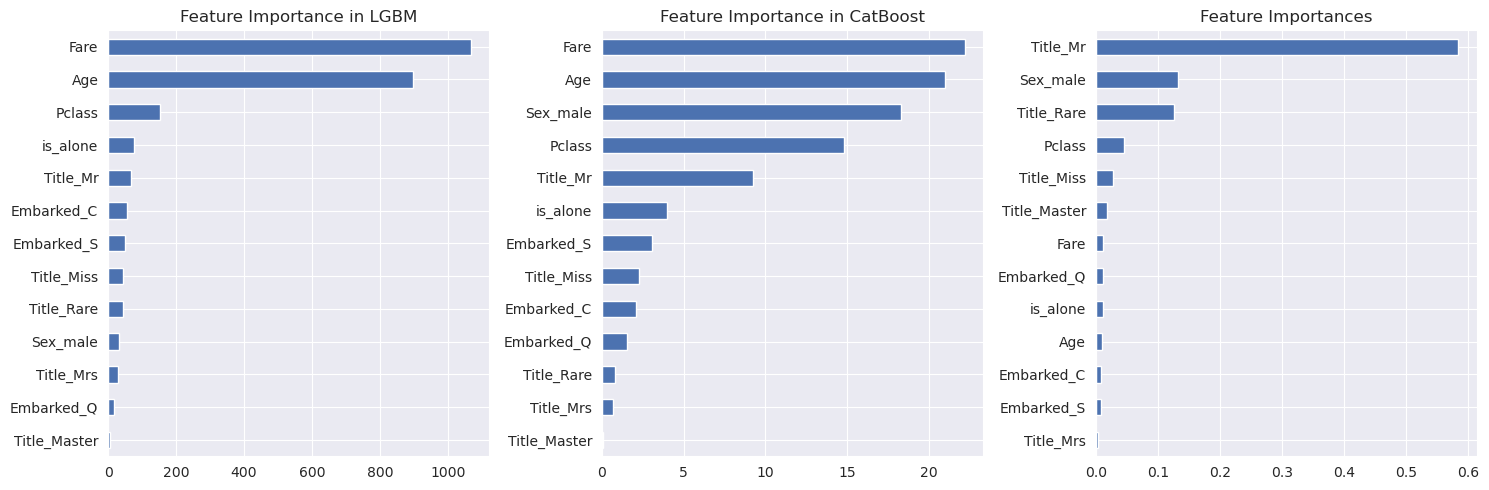

In [47]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

pd.Series(best_classifiers['LGBM'].feature_importances_,transformed_cols).sort_values(ascending=True).plot.barh(ax=ax1)
ax1.set_title('Feature Importance in LGBM')

pd.Series(best_classifiers['CatBoost'].feature_importances_,transformed_cols).sort_values(ascending=True).plot.barh(ax=ax2)
ax2.set_title('Feature Importance in CatBoost')

pd.Series(best_classifiers['XGBoost'].feature_importances_,transformed_cols).sort_values(ascending=True).plot.barh(ax=ax3)
ax3.set_title('Feature Importance in XGBoost')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [48]:
# the threshold = 0.5 ,make the predictions either 1 or 0
preds = np.where(preds > 0.5 ,1, 0)

In [49]:
submission = pd.DataFrame({
        "PassengerId": test_copy["PassengerId"],
        "Survived": preds
    })

submission.to_csv("submission.csv", index=False)